In [1]:
%matplotlib inline

import matplotlib
matplotlib.style.use('seaborn-whitegrid')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.cluster import MiniBatchKMeans,KMeans, AgglomerativeClustering, DBSCAN
from scipy.spatial.distance import cdist,euclidean
from sklearn.preprocessing import normalize, StandardScaler,MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import PCA

from sklearn import svm



In [3]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 999)


In [4]:
pd.reset_option("display.max_rows")

In [5]:
columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [6]:
attacks = ["back",
"buffer_overflow",
"ftp_write",
"guess_passwd",
"imap",
"ipsweep",
"land",
"loadmodule",
"multihop",
"neptune",
"nmap",
"perl",
"phf",
"pod",
"portsweep",
"rootkit",
"satan",
"smurf",
"spy",
"teardrop",
"warezclient",
"warezmaster"]

types = ["dos",
"u2r",
"r2l",
"r2l",
"r2l",
"probe",
"dos",
"u2r",
"r2l",
"dos",
"probe",
"u2r",
"r2l",
"dos",
"probe",
"u2r",
"probe",
"dos",
"r2l",
"dos",
"r2l",
"r2l"]

dic_attacks = {"label":attacks,"type":types}

attack_typesDF = pd.DataFrame(dic_attacks, columns=["label","type"])

In [7]:
features = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"label"]

types = ["continuous.",
"symbolic.",
"symbolic.",
"symbolic.",
"continuous.",
"continuous.",
"symbolic.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"symbolic.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"symbolic.",
"symbolic.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"continuous.",
"symbolic."]


indicesf = []

for i in range(0, len(types)):
    if types[i] == "continuous.":
        indicesf.append(i)

numerical_features = np.take(features,indicesf)

indicesf = [0,5,11,14,15,16,17,18,30,31,36]

normal_relevant_features =  np.take(features,indicesf)

print (numerical_features)
print (normal_relevant_features)

escolhidas = [
"duration",
"src_bytes",
"dst_bytes",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate"]

print (escolhidas)

['duration' 'src_bytes' 'dst_bytes' 'wrong_fragment' 'urgent' 'hot'
 'num_failed_logins' 'num_compromised' 'root_shell' 'su_attempted'
 'num_root' 'num_file_creations' 'num_shells' 'num_access_files'
 'num_outbound_cmds' 'count' 'srv_count' 'serror_rate' 'srv_serror_rate'
 'rerror_rate' 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate'
 'srv_diff_host_rate' 'dst_host_count' 'dst_host_srv_count'
 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate']
['duration' 'dst_bytes' 'logged_in' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'srv_diff_host_rate'
 'dst_host_count' 'dst_host_srv_diff_host_rate']
['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_s

In [9]:
nslTrain = pd.read_csv(filepath_or_buffer='./dados/nsl-kdd/KDDTrain+.txt', \
                 names=columns, header=None)

In [11]:
nslTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

In [12]:
#for chunk in reader:
#    chunk.info()


## Teste 1 chunk
#chunk = reader.get_chunk(chunk_size)

In [13]:
nslTrain = pd.merge(nslTrain,attack_typesDF,how='left',on='label')
nslTrain = nslTrain.fillna('normal')

attack_indices = nslTrain[nslTrain.label != 'normal'].index
total_normal = len(nslTrain[nslTrain.label == 'normal'])


print('Total de tráfego normal:', total_normal)
print('Total de ataques:',len(attack_indices))

remove_n = len(attack_indices) - 8000
print('Quantidade de ataques utilizados:',len(attack_indices) - remove_n)
#print(remove_n)
drop_indices = np.random.choice(attack_indices, remove_n, replace=False)

# NSL KDD dataset with only 10% of attacks
nsl10Train = nslTrain.drop(drop_indices)

total = 20000

Total de tráfego normal: 67343
Total de ataques: 58630
Quantidade de ataques utilizados: 8000


In [14]:
def label_class(row):
    if row.label == 'normal':
        return False
    else:
        return True
    
nsl10Train['classe'] = nsl10Train.apply(lambda row: label_class (row), axis=1)

In [15]:
nsl10Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75343 entries, 0 to 125972
Data columns (total 45 columns):
duration                       75343 non-null int64
protocol_type                  75343 non-null object
service                        75343 non-null object
flag                           75343 non-null object
src_bytes                      75343 non-null int64
dst_bytes                      75343 non-null int64
land                           75343 non-null int64
wrong_fragment                 75343 non-null int64
urgent                         75343 non-null int64
hot                            75343 non-null int64
num_failed_logins              75343 non-null int64
logged_in                      75343 non-null int64
num_compromised                75343 non-null int64
root_shell                     75343 non-null int64
su_attempted                   75343 non-null int64
num_root                       75343 non-null int64
num_file_creations             75343 non-null int64
num

In [16]:
#nsl10Train.to_csv('./dados/KDDTrain+10att.csv',index=False)


In [17]:
#nsl10k = nsl10Train.sample(n=10000,random_state=10)

In [18]:
#nsl10k = nsl10k.reset_index()

In [19]:
#nsl10k.to_csv('./dados/KDDTrain10k.csv',index=False)

In [20]:
#nsl30k = nsl10Train.sample(n=30000,random_state=10)

In [21]:
#nsl50k = nsl10Train.sample(n=50000,random_state=10)

In [22]:
#nsl70k = nsl10Train.sample(n=70000,random_state=10)

In [23]:
total = 20000
#total = len(nsl10Train)
print(total)

20000


In [24]:
nslTrain['type'].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

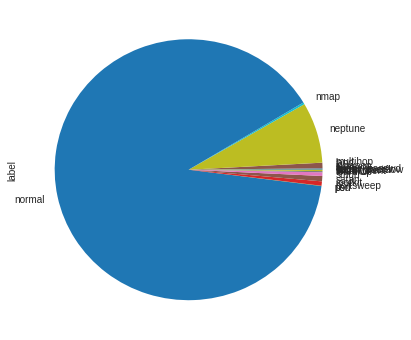

In [25]:
#chunk = chunk[chunk.label != 'neptune']
grouped_label = nsl10Train.groupby('label')
grouped_label['label'].count().plot.pie(figsize=(6, 6))

In [26]:
grouped_label = nsl10Train.groupby('label')

In [27]:
std_scaler = StandardScaler()
std_scaler.fit(nsl10Train[numerical_features])

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(nsl10Train[numerical_features])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [28]:
#sub = chunk[escolhidas]
#sub = chunk[normal_relevant_features]

In [29]:
#proto_dummies = pd.get_dummies(sub["protocol_type"], prefix='protocol_type')
#service_dummies = pd.get_dummies(sub['service'], prefix='service')
#flag_dummies = pd.get_dummies(sub['flag'], prefix='flag')

In [30]:
#subDF = pd.concat([sub,proto_dummies,service_dummies,flag_dummies], axis=1)
#subDF = subDF.drop(['protocol_type','service','flag'], axis=1)


In [31]:
def plot_PCA(X, dblabels, chunk_labels):   
    pca_2 = PCA(2)

    plot_columns = pca_2.fit_transform(X)

    plt.figure(figsize=(20,20))

    plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=dblabels)


    for lb, x, y in zip(chunk_labels, plot_columns[:,0],plot_columns[:,1]):
        plt.annotate(
            lb,
            xy = (x,y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0',facecolor='black'))

    plt.show()

In [32]:
import numpy as np

def fK(k, X, Skm1=0):
    """
    Computes f(K) proposed by Pham et al. 2004
    
    """
    d = len(X[0])
    
    a = lambda k, d: 1.0 - 3.0 / (4.0*d) if k == 2 \
        else a(k-1, d) + (1.0-a(k-1,d))/6.0
    
    estimator = MiniBatchKMeans(n_clusters=k, random_state=10, 
                                init='k-means++')
    estimator.fit_predict(X)
    Sk = estimator.inertia_
        
    if k == 1:
        f = 1
    if Skm1 == 0:
        f = 1
    else:
        f = Sk/(a(k,d)*Skm1)  
    
    return f, Sk


def testfK(maxk, X):
    ks = range(1,maxk+1)
    fs = np.zeros(len(ks))

    k = 1

    fs[0], Sk = fK(1, X)
    print (("# K: {}\tFS:{}\tSk:{}").format(k,fs[k-1], Sk))


    # Rest of Ks
    for k in ks[1:]:
        fs[k-1], Sk = fK(k, X, Skm1=Sk)
        print (("# K: {}\tFS:{}\tSk:{}").format(k,fs[k-1], Sk))

    foundfK = np.where(fs == fs.min())[0][0] + 1
    print (foundfK)

def testMeandist(maxk,X):
    meandist = []

    clusters = range(1,maxk)

    for n_clusters in clusters:
        clusterer = MiniBatchKMeans(n_clusters=n_clusters, random_state=10, init='k-means++')
        clusassign = clusterer.fit_predict(X)
        meandist.append(sum(np.min(cdist(X, clusterer.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    #    print("# {}: {}")\
    #        .format(n_clusters, meandist[n_clusters-1])  

    fig = plt.figure()
    
    plt.xlabel('Number of clusters')
    plt.ylabel('Average distance')
    plt.title('Selecting K with the Elbow Method')
    plt.plot(clusters, meandist)
    
def testInertia(maxk,X):
    
    inertia = []
    
    for k in range (1,maxk+1):
        k_means = MiniBatchKMeans(n_clusters=k, random_state=10, init='k-means++')
        k_means.fit(X)
        inertia.append(k_means.inertia_)
        
    ax = plt.subplot(111)
    ax.plot(inertia, '-o')
    plt.xticks(range(1,maxk))
    plt.title("Inertia")
    ax.set_ylabel('Inertia')
    ax.set_xlabel('# Clusters')
    plt.show() 

In [33]:
def euclidean_dist_calc(X, y, cluster_centers_):
    
    c_indices = []
    
    n_clusters = len(cluster_centers_)


    for i in range(0,n_clusters):
        c_indices.append(np.where(y == i)[0])
           
    euclidian_dist = np.empty(len(X))
    euclidian_dist.fill(np.nan)
    
    for k in range(0, n_clusters):
    
        for i in c_indices[k]:
            euclidian_dist[i] = euclidean(X[i], cluster_centers_[k]) 
            
    return euclidian_dist



def threshold_error (v, w, tau):
    """
    Recebe um elemento de dado (v) e calcula seu TEV em relação
    ao centróide (w) de acordo com um limiar tau.
    
    Retorna uma tupla com o TEV e o TEQ
    """

    #print(v)
    #print(w)
    
    
    #se algum dos vetores de data_list tiver dimensão diferente da de center, o programa finaliza
    if (len(v) != len(w)) | (v.ndim != w.ndim):

        print ("Data_list and center have diffent numbers of elements!")
        return 0

    tev = 0
    teq = 0
    
    qe = abs(w - v) #diff armazena um vetor com o módulo da diferença entre os elementos de w e v
    
    #print(qe)
    
    for i in range (len(qe)):
        teq = teq + qe[i]
        if (qe[i] > tau):
            tev = tev + qe[i]
        
    #print ("The threshold error value for QE =", qe, "is", tev, "and TEQ is",teq)
    
    return (tev,teq)
        
        
a = np.array([1, 2])
b = np.array([2,4])
w = np.array([17, 18])

threshold_error(a, w, 14)
threshold_error(b, w, 14)

def update_W (v, w, n, m, alpha):

    #se algum dos vetores de data_list tiver dimensão diferente da de center, o programa finaliza
    if (v.ndim != w.ndim):
        print ("Data_list and center have diffent numbers of elements!")
        return 0

    #m = len(v)
    
    x = v
    
    w = (w * n * alpha + x*m)/(n * alpha + m)
    
    #diff = w - v #diff armazena um vetor com a diferença entre os elementos de w e v
    #print(diff)
    #for i in range (len(diff)):
    #    w = alpha*w +  diff[i]
    return (w)

a = np.array([[1,2], [3,4], [5,6]])
b = np.array([5, 6])

update_W (a.mean(axis=0), b, 3, len(a), 0.1)

def tev_teq (v,centers,tau, model):
    result = []
    
    for i in range(len(v)):
        result.append(threshold_error(v[i],model.cluster_centers_[centers[i]],tau))
        
    return result

In [34]:
#labels = nsl10Train['label'].values
#subDF = nsl10Train[numerical_features]
#cols = subDF.columns.tolist()

#X = std_scaler.transform(subDF)

In [35]:
#Kmeans = MiniBatchKMeans(n_clusters=40,random_state=10, init='k-means++')

In [36]:
#y = Kmeans.fit_predict(X)

In [44]:
total = len(nsl10Train)

In [45]:
def run_train(total,eps_, min_samples_, kmodel, E, chunk_size=2000, tau1=0.5, tau2=1.0, rd_threshold=0.5, alpha=1.0, adapt=True, fw=True):
    

    total_FW = 0
    
    DB_N_cluster = []
    DB_TPR = []
    DB_FPR = []
    DB_precision = []
    DB_FS = []
    
    KM_ED_TPR = []
    KM_ED_FPR = []
    KM_ED_precision = []
    KM_ED_FS = []

    KM_TE_TPR = []
    KM_TE_FPR = []
    KM_TE_precision = []
    KM_TE_FS = []
    
    SVM_TPR = []
    SVM_FPR = []
    SVM_precision = []
    SVM_FS = []
    

    indices = []    
    
    i = 0
    
    clf = svm.OneClassSVM(nu=0.0001, kernel="rbf", gamma=0.1)
   

    outputDF = pd.DataFrame()


    
    while (i < total):

        
        indices.append(i)

        if (i + chunk_size) < total:
            chunk = nsl10Train[i:(i + chunk_size)]
        else:
            chunk = nsl10Train[i:total]
        i = i + chunk_size

        chunk_labels = chunk['label'].values
        chunk_classes = chunk['classe'].values
        chunk_difficulty = chunk['difficulty'].values
        qtd_normal = chunk[chunk.label == 'normal'].count()[0]
        qtd_attack = chunk[chunk.label != 'normal'].count()[0]

        subDF = chunk[numerical_features]
        cols = subDF.columns.tolist()

        #X = minmax_scaler.transform(subDF)
        #X = normalize(subDF)
        X = std_scaler.transform(subDF)


        ## DBSCAN
        db = DBSCAN(eps=eps_, min_samples=min_samples_).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        dblabels = db.labels_

        outliers = 1 if -1 in dblabels else 0

        n_clusters_ = len(set(dblabels)) - (outliers)
        DB_N_cluster.append(n_clusters_)
        #print("N_clusters: {}".format(n_clusters_))


        resultDF = pd.DataFrame(X, columns=cols)
        resultDF['DBcluster'] = dblabels

        media = resultDF.groupby('DBcluster').mean().values

        resultDF['label'] = chunk_labels
        resultDF['classe'] = chunk_classes

        resultDF['DB_ED'] = euclidean_dist_calc(X, dblabels,media[1:] if outliers else media)
        resultDF['difficulty'] = chunk_difficulty

        #variance = resultDF.groupby('DBcluster')['DB_ED'].std()

        # Densidade (numero de pontos) pertencentes a um cluster
        Dc = []

        for k in range(0, n_clusters_):        
            #density.append((resultDF[resultDF.DBcluster == k]['DB_ED']).apply(lambda x: math.exp(-x**2/(2*(variance[k]**2)))).sum())
            #Dc.append(resultDF[resultDF.DBcluster == k].count()[0])
            Dc = resultDF.groupby('DBcluster')['DB_ED'].count()

        # Densidade esperada dos clusters (neste caso será utilizada a média entre o número de elementos e o número de clusters)
        try:
            EDs = chunk_size / n_clusters_
            
            RD = Dc / EDs

            normal_clusters = (RD[RD >= rd_threshold].index)
            anomaly_clusters = (RD[RD < rd_threshold].index)
                       
        
        except:
            
            normal_clusters = pd.Series([])
            anomaly_clusters = pd.Series([-1])
            
            
        TP = (resultDF[resultDF.DBcluster.isin(anomaly_clusters.values)][resultDF.label != 'normal'])
        FN = (resultDF[resultDF.DBcluster.isin(normal_clusters.values)][resultDF.label != 'normal'])
        FP = (resultDF[resultDF.DBcluster.isin(anomaly_clusters.values)][resultDF.label == 'normal'])
               

        tpr = len(TP) / qtd_attack
        fpr = len(FP) / qtd_normal
        
        try:         
            precision = len(TP)/(len(TP) + len(FP))        
            f_score = 2 * ((precision * tpr)/(precision + tpr)) 
            
        except ZeroDivisionError:           
            precision = 0
            f_score = 0        
        
        DB_TPR.append(tpr)
        DB_FPR.append(fpr)
        DB_precision.append(precision)              
        DB_FS.append(f_score)


        normal = resultDF[resultDF.DBcluster.isin(normal_clusters.values)]
        anomaly = resultDF[resultDF.DBcluster.isin(anomaly_clusters.values)]

        normal['Detect'] = 0
        anomaly['Detect'] = -1

        
        if i - chunk_size == 0:        
            if len(normal) > 0:        
                normal['KMcluster'] = kmodel.fit_predict(normal[numerical_features].values)

            else:
                kmodel.partial_fit(anomaly[numerical_features].values)
                
                
        elif adapt == True:
            #print('Adapting...')
            if len(normal) != 0:                
            
                centers = kmodel.cluster_centers_
                #print(centers)
                normal['KMcluster'] = kmodel.predict(normal[numerical_features].values)
                v = normal.groupby('KMcluster')[numerical_features].mean().values
                #print(v)
                for c in range(len(v)):
                    centers[c] = update_W(v[c],centers[c], (i-chunk_size), chunk_size, alpha)

                kmodel.cluster_centers_ = centers

                #print(kmodel.cluster_centers_)
        else:
            if len(normal) > 0 :
                normal['KMcluster'] = kmodel.predict(normal[numerical_features].values)
           
                

        
        anomaly['KMcluster'] = kmodel.predict(anomaly[numerical_features].values)
        anomaly['KM_ED'] = euclidean_dist_calc(anomaly[numerical_features].values,
                                               anomaly['KMcluster'].values,
                                               kmodel.cluster_centers_)

        anomaly['TEV'] = 0
        anomaly['TEQ'] = 0
        anomaly[['TEV','TEQ']] = tev_teq(anomaly[numerical_features].values,
                                         anomaly.KMcluster.values, 
                                         tau1, kmodel)
        
        normal['TEV'] = 0
        normal['TEQ'] = 0
        #normal[['TEV','TEQ']] = tev_teq(normal[numerical_features].values,
        #                                 normal.KMcluster.values, 
        #                                 tau1, kmodel)

   

        
        #if i - chunk_size == 0:        
        #   if len(normal) > 0:        
        #       clf.fit(normal[numerical_features].values)
        #   else:
        #        clf.fit(anomaly[numerical_features].values)

        
        

        #anomaly['OneSVM'] = clf.predict(anomaly[numerical_features].values)
        #TP
        #TP = anomaly[anomaly.label != 'normal'][anomaly.OneSVM == -1]
        #FP
        #FP = anomaly[anomaly.label == 'normal'][anomaly.OneSVM == -1]
        #FN
        #FN = anomaly[anomaly.label != 'normal'][anomaly.OneSVM != -1]
        
        
        #tpr = len(TP) / qtd_attack
        #fpr = len(FP) / qtd_normal
        
        #try:         
        #    precision = len(TP)/(len(TP) + len(FP))        
        #    f_score = 2 * ((precision * tpr)/(precision + tpr)) 
            
        #except ZeroDivisionError:           
        #    precision = 0
        #    f_score = 0        
        
        #SVM_TPR.append(tpr)
        #SVM_FPR.append(fpr)
        #SVM_precision.append(precision)              
        #SVM_FS.append(f_score)        
        
        
        
        #KM_limiar = anomaly.groupby('KMcluster')['KM_ED'].quantile(tau2)
        #KM_limiar = pd.Series([1.1,2.0,2.0,1.5,2.1])
        #print(KM_limiar)


        #Verdadeiro positivo: ED é maior do que o limiar e é ataque
        TP = (anomaly[anomaly.KM_ED > E][anomaly.label != "normal"])

        #Falso negativo: ED é menor que o limiar, mas é ataque
        FN = (anomaly[anomaly.KM_ED <= E][anomaly.label != "normal"])

        #Falso positivo: ED é maior do que o limiar, mas é normal 
        FP = (anomaly[anomaly.KM_ED > E][anomaly.label == "normal"])
        
        tpr = len(TP) / qtd_attack
        fpr = len(FP) / qtd_normal
        
        try:         
            precision = len(TP)/(len(TP) + len(FP))        
            f_score = 2 * ((precision * tpr)/(precision + tpr)) 
            
        except ZeroDivisionError:           
            precision = 0
            f_score = 0
        
        KM_ED_TPR.append(tpr)
        KM_ED_FPR.append(fpr)
        KM_ED_precision.append(precision)              
        KM_ED_FS.append(f_score)
        
     
        
        #if tau2 == 0:
        #    tau2 = normal['TEV'].max()
        #else:
        #    tau2 = (normal['TEV'].max() + tau2) / 2
        
        
        #KM_limiar = anomaly.groupby('KMcluster')['TEV'].quantile(tau2)
        #print(KM_limiar)

        #Verdadeiro positivo: ED é maior do que o limiar e é ataque
        TP = (anomaly[anomaly.TEV > E][anomaly.label != "normal"])

        #Falso negativo: ED é menor que o limiar, mas é ataque
        FN = (anomaly[(anomaly['TEV'] <= E) & (anomaly['TEV'] <= tau2)][anomaly.label != "normal"])
        FW = (anomaly[(anomaly['TEV'] <= E) & (anomaly['TEV'] > tau2)][anomaly.label != "normal"])

        #Falso positivo: ED é maior do que o limiar, mas é normal 
        FP = (anomaly[anomaly.TEV > E][anomaly.label == "normal"])        
        
        
                
        
        if fw:
            #print('Encaminhando:',len(FW), 'tau2:', tau2)
            tp = (len(TP) + len(FW))           
            
            
            FW = (anomaly[(anomaly['TEV'] <= E) & (anomaly['TEV'] > tau2)])
            total_FW = total_FW + len(FW)
        else:
            tp = len(TP)            
        
        
        tpr =  tp / qtd_attack
        
        fpr = len(FP) / qtd_normal
        
        try:
            precision = tp /(tp + len(FP))        
            f_score = 2 * ((precision * tpr)/(precision + tpr))
            
        except ZeroDivisionError:           
            precision = 0
            f_score = 0      
        
        KM_TE_TPR.append(tpr)
        KM_TE_FPR.append(fpr)
        KM_TE_precision.append(precision)              
        KM_TE_FS.append(f_score)
        
        
        outputDF = pd.concat([outputDF, normal, anomaly])
        
        
        
    tprD = {'DB_TPR': pd.Series(DB_TPR, index=indices),
           'ED_TPR':pd.Series(KM_ED_TPR, index=indices),
           'TE_TPR':pd.Series(KM_TE_TPR, index=indices),
           'SVM_TPR': pd.Series(SVM_TPR, index=indices) }

    tprDF = pd.DataFrame(tprD)


    fprD = {'DB_FPR': pd.Series(DB_FPR, index=indices),
           'ED_FPR':pd.Series(KM_ED_FPR, index=indices),
           'TE_FPR':pd.Series(KM_TE_FPR, index=indices),
           'SVM_FPR': pd.Series(SVM_FPR, index=indices)
          }
    fprDF = pd.DataFrame(fprD)
    
    
    precisionDF = pd.DataFrame({
           'DB_precision':pd.Series(DB_precision, index=indices),
           'ED_precision':pd.Series(KM_ED_precision, index=indices),
           'TE_precision':pd.Series(KM_TE_precision, index=indices),
           'SVM_precision': pd.Series(SVM_precision, index=indices)
        } 
    )
    
    fsDF = pd.DataFrame({
            'DB':pd.Series(DB_FS, index=indices),
           'ED':pd.Series(KM_ED_FS, index=indices),
           'TE':pd.Series(KM_TE_FS, index=indices),
           'SVM': pd.Series(SVM_FS, index=indices)
        } 
    )
    
    
    #plot_PCA(anomaly[numerical_features], anomaly.KMcluster, chunk_labels)
    
    #print (total_FW)
    
    return (outputDF)
    
    

In [46]:
kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

result = run_train(
    total,
    eps_=1,
    min_samples_=4,
    E=3.0, 
    kmodel=kmodel,
    chunk_size=500,
    tau1=0.5,
    tau2=1.0,
    rd_threshold=0.5,
    alpha=0.5,
    fw=True                         
)

ValueError: Length of passed values is 0, index implies 151

In [ ]:
len(numerical_features)

In [ ]:
db_tp/ qtd_attack

In [ ]:
eps_values = [1.0,1.5,2.0,2.5,3.0,5.0]
#eps_values = [1.0]
min_values = [4,8,16,32,64,128,256]
#min_values = [160,320]
#db_threshold_values = [0.2,0.4,0.6,0.8]

In [ ]:
import sys

kmodel = MiniBatchKMeans(n_clusters=5,random_state=10, init='k-means++')



dic = {}

for i in range (0,len(eps_values)):
    print('\n\n-- eps:', eps_values[i])
    
    tpr = []
    fpr = []
    
    tpr.append(0.0)
    fpr.append(0.0)
    
    for j in range (0, len(min_values)):
        #print('---- min_samples:', min_values[j])

        
        #for k in range (0, len(db_threshold_values)):
        

        #print('------ db_threshold:', db_threshold_values[k])


        result = run_train(
            total, 
            eps_=eps_values[i],
            min_samples_=min_values[j], 
            E=0.9, 
            kmodel=kmodel,
            chunk_size=500,
            tau1=0.6,
            rd_threshold=0.5,
            alpha=0.1,
            tau2=1.0,
            fw=False
        )


        
        db_tp = len(result[(result.Detect == -1) & (result.classe == True)])
        db_fp = len(result[(result.Detect == -1) & (result.classe == False)])
            
        db_tpr =  db_tp / qtd_attack
        db_fpr =  db_fp / qtd_normal
        
        
        precisao = db_tp / (db_tp + db_fp)
        
        db_fs = 2 * (precisao * db_tpr) / (precisao + db_tpr)
        
        
        print('min_samples:',min_values[j],'\t', db_tpr, '\t', db_fpr, '\t', db_fs)

        
        
        
        tpr.append(db_tpr)
        fpr.append(db_fpr)
    
    dic[eps_values[i]] = (tpr, fpr)
    
print(dic)

In [ ]:
import pickle

In [ ]:
/home/vinicius/Dropbox/Faculdade/Mestrado/Artigowith open('dic_tefa-db.pkl', 'wb') as pickle_file:
    pickle.dump(dic, pickle_file)

In [ ]:
with open('dic.pkl', 'rb') as pickle_file:
    dic = pickle.load(pickle_file)

In [ ]:
print (plt.figure().canvas.get_supported_filetypes())

In [ ]:
plt.figure(figsize=(5,5))
plt.ylabel('TPR')
plt.xlabel('FPR')

plt.plot(dic[eps_values[0]][1], dic[eps_values[0]][0], ls='-.', label='eps = ' + str(eps_values[0]), marker='D')

plt.plot(dic[eps_values[1]][1], dic[eps_values[1]][0], ls='--', label='eps = '+ str(eps_values[1]), marker='*')

plt.plot(dic[eps_values[2]][1], dic[eps_values[2]][0], ls='-', label='eps = '+ str(eps_values[2]), marker='>')

plt.plot(dic[eps_values[3]][1], dic[eps_values[3]][0], ls=':', label='eps = '+ str(eps_values[3]), marker='d')

plt.plot(dic[eps_values[4]][1], dic[eps_values[4]][0], ls='solid', label='eps = '+ str(eps_values[4]), marker='v')

plt.plot(dic[eps_values[5]][1], dic[eps_values[5]][0], ls='-.', label='eps = '+ str(eps_values[5]), marker='+')


plt.legend(loc=4)



plt.savefig('./figuras/dbs-eps-nsl.png', format='png',dpi=1000)

In [ ]:
plt.figure(figsize=(5,5))

plt.ylabel('TPR')
plt.xlabel('FPR')


lab = ['minPts = 4','minPts = 8','minPts = 16','minPts = 32','minPts = 64','minPts = 128','minPts = 256']
mark = ['D','*','>','d','.','o','<']

for i  in range(0,7):
    
    x = [0.0, dic[eps_values[0]][1][i+1],dic[eps_values[1]][1][i+1],dic[eps_values[2]][1][i+1],dic[eps_values[3]][1][i+1],dic[eps_values[4]][1][i+1]]
    y = [0.0, dic[eps_values[0]][0][i+1],dic[eps_values[1]][0][i+1],dic[eps_values[2]][0][i+1],dic[eps_values[3]][0][i+1],dic[eps_values[4]][0][i+1]]
       
    x.sort()
    y.sort()
    
    plt.plot(x, y, ls='-.', label=lab[i], marker=mark[i])

plt.legend(loc=4)

plt.savefig('./figuras/dbs-min-nsl.png',format='png',dpi=1000)

In [ ]:
minPt = 8
ep = 1.5
n = 500

In [ ]:
eps_ed = [4,5,6,8,10,12]

ks = [1,2,4,8,16,32,64]

k_dic = {}

for k in ks:

    
    tprv = []
    fprv = []
    
    kmodel = MiniBatchKMeans(n_clusters=k,random_state=10, init='k-means++')

    print('--k:', k)
    
    result = run_train(eps_=ep,
                             min_samples_=minPt,
                             E=E, 
                             kmodel=kmodel,
                             chunk_size=n,
                             tau1=0,
                             rd_threshold=0.5,
                             alpha=1.0,
                             tau2=E,
                             adapt=True
                            )
    
    for E in eps_ed:
        
        #Verdadeiro positivo: ED é maior do que o limiar e é ataque
        tp = len(result[(result.KM_ED > E) & (result.classe != False)])

        #Falso negativo: ED é menor que o limiar, mas é ataque
        fn = len(result[(result.KM_ED <= E) & (result.classe != False)])

        #Falso positivo: ED é maior do que o limiar, mas é normal 
        fp = len(result[(result.KM_ED > E) & (result.classe == False)]) 
        
        tpr = tp / qtd_attack
        fpr = fp / qtd_normal
        

        precisao = tp / (tp + fp)
        
        fs = 2 * (precisao * tpr) / (precisao + tpr)
        
        
        print('e:', E,'\t',tpr,'\t',fpr,'\t',fs)

        tprv.append(tpr)
        fprv.append(fpr)
    
    k_dic[k] = (tprv, fprv)
    

In [ ]:
with open('dic_ks.pkl', 'wb') as pickle_file:
    pickle.dump(k_dic, pickle_file)

In [ ]:
with open('dic_ks.pkl', 'rb') as pickle_file:
    k_dic = pickle.load(pickle_file)

In [ ]:
plt.figure()
plt.ylabel('TPR')
plt.xlabel('FPR')


for k in ks:
    x = k_dic[k][1]
    y = k_dic[k][0]
    
    x.sort()
    y.sort()
    
    plt.plot(x,y,label = k, ls='--',marker='o')
    
plt.legend(loc=4)

plt.yticks = [0,0.25,0.5,0.75,1.0]
plt.xticks = [0,0.25,0.5,0.75,1.0]



plt.savefig('./figuras/many-ks.png', dpi=1000)

In [ ]:
test_alpha = [0,1.0]

dic_alpha = {}

kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

result = run_train(eps_=ep,
                         min_samples_=minPt,
                         E=6.0, 
                         kmodel=kmodel,
                         chunk_size=n,
                         
                         rd_threshold=0.5,
                         
                         
                         adapt=False
                        )


E = 8

#Verdadeiro positivo: ED é maior do que o limiar e é ataque
tp = len(result[(result.KM_ED > E) & (result.classe != False)])

#Falso negativo: ED é menor que o limiar, mas é ataque
fn = len(result[(result.KM_ED <= E) & (result.classe != False)])

#Falso positivo: ED é maior do que o limiar, mas é normal 
fp = len(result[(result.KM_ED > E) & (result.classe == False)]) 

tpr = tp / qtd_attack
fpr = fp / qtd_normal

precisao = tp / (tp + fp)
        
fs = 2 * (precisao * tpr) / (precisao + tpr)

print('no_adapt:\t',tpr,'\t',fpr,'\t',fs)

dic_alpha['no_adapt'] = (tpr,fpr)

for a in test_alpha:
    kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')
    
    
    result = run_train(eps_=ep,
                             min_samples_=minPt,
                             E=5.0, 
                             kmodel=kmodel,
                             chunk_size=n,
                             
                             rd_threshold=0.5,
                             alpha=a,
                             
                             adapt=True
                            )
    
    E = 8

    #Verdadeiro positivo: ED é maior do que o limiar e é ataque
    tp = len(result[(result.KM_ED > E) & (result.classe != False)])

    #Falso negativo: ED é menor que o limiar, mas é ataque
    fn = len(result[(result.KM_ED <= E) & (result.classe != False)])

    #Falso positivo: ED é maior do que o limiar, mas é normal 
    fp = len(result[(result.KM_ED > E) & (result.classe == False)]) 

    tpr = tp / qtd_attack
    fpr = fp / qtd_normal
    
    precisao = tp / (tp + fp)
        
    fs = 2 * (precisao * tpr) / (precisao + tpr)
    
    print('alpha:', a,'\t',tpr,'\t',fpr,'\t',fs)
    dic_alpha[a] = (tpr,fpr)
    
print(dic_alpha)


In [ ]:
eps_ed = [1,2,4,6,8,10,12,14,16,20,25,30]
tau1_ = [0,1,2,3,4,5]

kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

for t in tau1_:
    print ('-- tau1:', t)
    result = run_train(eps_=1.5,
                         min_samples_=8,
                         E=2, 
                         kmodel=kmodel,
                         chunk_size=n,
                         tau1=t,
                         rd_threshold=0.5,
                         alpha=1.0,
                         tau2=2,
                         adapt=True,
                         fw = False
                        )

    for E in eps_ed:
    
        
        tau2 = 1

        tp = len(result[(result.TEV > E) & (result.classe != False)])
        tpfw = len(result[(result.TEV > tau2) & (result.classe != False)])
        #Falso negativo: ED é menor que o limiar, mas é ataque
        fn = len(result[(result['TEV'] <= E) & (result['TEV'] <= tau2) & (result.classe != False)])

        fw = len(result[(result['TEV'] <= E) & (result['TEV'] > tau2) & (result.classe != False)])

        #Falso positivo: ED é maior do que o limiar, mas é normal 
        fp = len(result[(result['TEV'] > E) & (result.classe == False)])
        
        
        tpr = tp / qtd_attack
        fpr = fp / qtd_normal

        precisao = tp / (tp + fp)

        fs = 2 * (precisao * tpr) / (precisao + tpr)
        
        print('e:', E,'\t',tpr,'\t',fpr,'\t',fs)
    

In [ ]:
tau1_ = [3]

tau2_ = [0,2,4,6,8]



t2_tpr = []
t2_fpr = []
t2_indice = []

E = 10


for t1 in tau1_:
    print ('-- tau1:', t1)


    kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

    result = run_train(eps_=1.5,
                         min_samples_=8,
                         E=10, 
                         kmodel=kmodel,
                         chunk_size=n,
                         tau1=t1,
                         rd_threshold=0.5,
                         alpha=1.0,
                         tau2=1,
                         adapt=True,
                         fw = True
                        )


    t2_tpr = []
    t2_fpr = []
    t2_fwr = []
    t2_indice = []

    for t2 in tau2_:

        tau2 = t1 + t2

        tp = len(result[(result.TEV > E) & (result.classe != False)])
        tpfw = len(result[(result.TEV > tau2) & (result.classe != False)])

        tp = tpfw
        #Falso negativo: ED é menor que o limiar, mas é ataque
        fn = len(result[(result['TEV'] <= E) & (result['TEV'] <= tau2) & (result.classe != False)])

        fw = len(result[(result['TEV'] <= E) & (result['TEV'] > tau2) & (result.classe != False)])

        #Falso positivo: ED é maior do que o limiar, mas é normal 
        fp = len(result[(result['TEV'] > E) & (result.classe == False)])


        tpr = tp / qtd_attack
        fpr = fp / qtd_normal

        fwr = fw / total

        precisao = tp / (tp + fp)

        fs = 2 * (precisao * tpr) / (precisao + tpr)




        print('tau2:', tau2,'\t',tpr,'\t',fpr,'\t',fs, '\t',fwr)
        t2_tpr.append(tpr)
        t2_fpr.append(fpr)
        t2_fwr.append(fwr)
        t2_indice.append(tau2)

In [ ]:
plt.ylabel('TPR')
plt.xlabel('Valor de tau2')
plt.title('Impacto do parâmetro tau2')


plt.plot(t2_indice,t2_tpr)
plt.plot(t2_indice,t2_fpr)
plt.plot(t2_indice,t2_fwr)


plt.legend(loc=4)

plt.show()

In [ ]:
kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

result = run_train(eps_=1.5,
                         min_samples_=8,
                         E=10, 
                         kmodel=kmodel,
                         chunk_size=500,
                         tau1=3,
                         rd_threshold=0.5,
                         alpha=1.0,
                         tau2=3,
                         adapt=True,
                         fw = True
                        )

In [ ]:
E_tev = 10
E_ed = 7

In [ ]:
qtd_normal = len(result[result.classe == False])
qtd_attack = len(result[result.classe == True])


db_tp = len(result[(result.Detect == -1) & (result.classe == True)])
db_fp = len(result[(result.Detect == -1) & (result.classe == False)])

tpr = db_tp /qtd_attack
fpr = db_fp / qtd_normal

precisao = db_tp / (db_tp + db_fp)
fs = 2 * (precisao * tpr) / (precisao + tpr)
print("DBS results:")
print(tpr,'\t',fpr,'\t',fs,'\t',precisao)


#TP
svm_tp = len(result[(result.classe != False) & (result.OneSVM == -1)])
#FP
svm_fp = len(result[(result.classe == False) & (result.OneSVM == -1)])
#FN
svm_fn = len(result[(result.classe != False) & (result.OneSVM != -1)])

tpr = svm_tp /qtd_attack
fpr = svm_fp / qtd_normal

precisao = svm_tp / (svm_tp + svm_fp)
fs = 2 * (precisao * tpr) / (precisao + tpr)
print("DBS-SVM results:")
print(tpr,'\t',fpr,'\t',fs,'\t',precisao)


#Verdadeiro positivo: ED é maior do que o limiar e é ataque
km_ed_tp = len(result[(result.KM_ED > E_ed) & (result.classe != False)])

#Falso negativo: ED é menor que o limiar, mas é ataque
km_ed_fn = len(result[(result.KM_ED <= E_ed) & (result.classe != False)])

#Falso positivo: ED é maior do que o limiar, mas é normal 
km_ed_fp = len(result[(result.KM_ED > E_ed) & (result.classe == False)])    


tpr = km_ed_tp / qtd_attack
fpr = km_ed_fp / qtd_normal

precisao = km_ed_tp / (km_ed_tp + km_ed_fp)
fs = 2 * (precisao * tpr) / (precisao + tpr)
print("KM-ED results:")
print(tpr,'\t',fpr,'\t',fs,'\t',precisao)


km_tev_tp = len(result[(result.TEV > E_tev) & (result.classe != False)])
km_tev_tpfw = len(result[(result.TEV > tau2) & (result.classe != False)])
#Falso negativo: ED é menor que o limiar, mas é ataque
km_tev_fn = len(result[(result['TEV'] <= E_tev) & (result['TEV'] <= tau2) & (result.classe != False)])

km_tev_fw = len(result[(result['TEV'] <= E_tev) & (result['TEV'] > tau2) & (result.classe != False)])

#Falso positivo: ED é maior do que o limiar, mas é normal 
km_tev_fp = len(result[(result['TEV'] > E_tev) & (result.classe == False)])

tpr = km_tev_tpfw / qtd_attack
fpr = km_tev_fp / qtd_normal

fwr = km_tev_fw / total

precisao = km_tev_tpfw / (km_tev_tpfw + km_tev_fp)

fs = 2 * (precisao * tpr) / (precisao + tpr)

print("TEV results:")
print(tpr,'\t',fpr,'\t',fs,'\t',precisao)



In [42]:
%%timeit -n 5
kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

result = run_train(total=10000,
                   eps_=1.5,
                         min_samples_=8,
                         E=10, 
                         kmodel=kmodel,
                         chunk_size=500,
                         tau1=3,
                         rd_threshold=0.5,
                         alpha=1.0,
                         tau2=3,
                         adapt=True,
                         fw = True
                        )

5 loops, best of 3: 12.8 s per loop


In [43]:
%%timeit -n 5
kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

result = run_train(total=20000,
                   eps_=1.5,
                         min_samples_=8,
                         E=10, 
                         kmodel=kmodel,
                         chunk_size=500,
                         tau1=3,
                         rd_threshold=0.5,
                         alpha=1.0,
                         tau2=3,
                         adapt=True,
                         fw = True
                        )

5 loops, best of 3: 24.1 s per loop


In [44]:
%%timeit -n 5
kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

result = run_train(total=40000,
                   eps_=1.5,
                         min_samples_=8,
                         E=10, 
                         kmodel=kmodel,
                         chunk_size=500,
                         tau1=3,
                         rd_threshold=0.5,
                         alpha=1.0,
                         tau2=3,
                         adapt=True,
                         fw = True
                        )

5 loops, best of 3: 47.6 s per loop


In [45]:
%%timeit -n 5
kmodel = MiniBatchKMeans(n_clusters=4,random_state=10, init='k-means++')

result = run_train(total=70000,
                   eps_=1.5,
                         min_samples_=8,
                         E=10, 
                         kmodel=kmodel,
                         chunk_size=500,
                         tau1=3,
                         rd_threshold=0.5,
                         alpha=1.0,
                         tau2=3,
                         adapt=True,
                         fw = True
                        )

5 loops, best of 3: 1min 22s per loop


In [46]:
%%timeit -n 5
X = std_scaler.transform(nsl10Train[numerical_features])
db = DBSCAN(eps=1.5, min_samples=8).fit(X[:10000])

5 loops, best of 3: 8.64 s per loop


In [47]:
%%timeit -n 5
X = std_scaler.transform(nsl10Train[numerical_features])
db = DBSCAN(eps=1.5, min_samples=8).fit(X[:20000])

5 loops, best of 3: 38.9 s per loop


In [ ]:
%%timeit -n 5
X = std_scaler.transform(nsl10Train[numerical_features])
db = DBSCAN(eps=1.5, min_samples=8).fit(X[:40000])

5 loops, best of 3: 2min 42s per loop


In [ ]:
%%timeit -n 5
X = std_scaler.transform(nsl10Train[numerical_features])
db = DBSCAN(eps=1.5, min_samples=8).fit(X[:70000])

In [38]:
%%timeit -n 5
X = std_scaler.transform(nsl10Train[numerical_features])
kmodels = KMeans(n_clusters=4, init='k-means++', n_jobs=-1,random_state=10)
kmodels.fit(X[:10000])

5 loops, best of 3: 293 ms per loop


In [39]:
%%timeit -n 5
X = std_scaler.transform(nsl10Train[numerical_features])
kmodels = KMeans(n_clusters=4, init='k-means++', n_jobs=-1,random_state=10)
kmodels.fit(X[:20000])

5 loops, best of 3: 417 ms per loop


In [40]:
%%timeit -n 5
X = std_scaler.transform(nsl10Train[numerical_features])
kmodels = KMeans(n_clusters=4, init='k-means++', n_jobs=-1,random_state=10)
kmodels.fit(X[:40000])

5 loops, best of 3: 771 ms per loop


In [41]:
%%timeit -n 5
X = std_scaler.transform(nsl10Train[numerical_features])
kmodels = KMeans(n_clusters=4, init='k-means++', n_jobs=-1,random_state=10)
kmodels.fit(X[:70000])

5 loops, best of 3: 1.12 s per loop
